In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('wine.xls - wine.xls.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [10]:
names =  ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
             "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", 
             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
df = pd.read_csv('wine.xls - wine.xls.csv',header=None,names=names)
df.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
df.describe().round()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,2.0,13.0,2.0,2.0,19.0,100.0,2.0,2.0,0.0,2.0,5.0,1.0,3.0,747.0
std,1.0,1.0,1.0,0.0,3.0,14.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,315.0
min,1.0,11.0,1.0,1.0,11.0,70.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,278.0
25%,1.0,12.0,2.0,2.0,17.0,88.0,2.0,1.0,0.0,1.0,3.0,1.0,2.0,500.0
50%,2.0,13.0,2.0,2.0,20.0,98.0,2.0,2.0,0.0,2.0,5.0,1.0,3.0,674.0
75%,3.0,14.0,3.0,3.0,22.0,107.0,3.0,3.0,0.0,2.0,6.0,1.0,3.0,985.0
max,3.0,15.0,6.0,3.0,30.0,162.0,4.0,5.0,1.0,4.0,13.0,2.0,4.0,1680.0


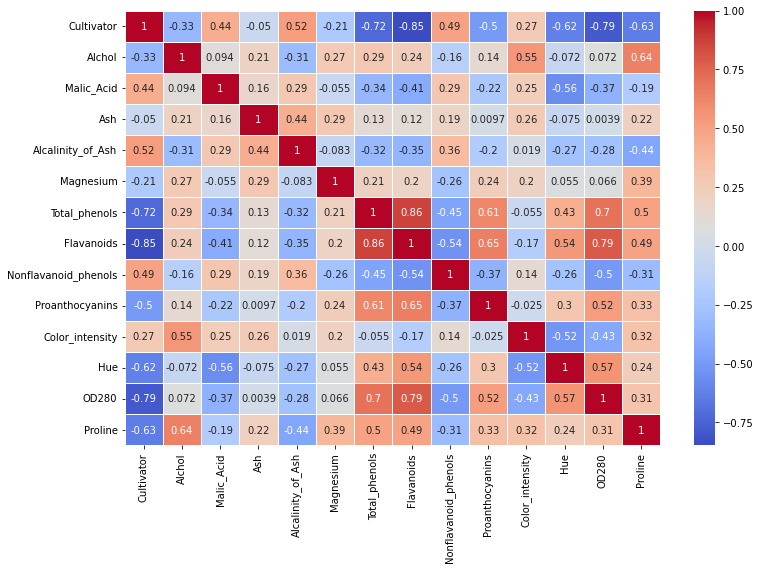

In [20]:
plt.figure(figsize=(12,8),)
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='coolwarm')
plt.show()

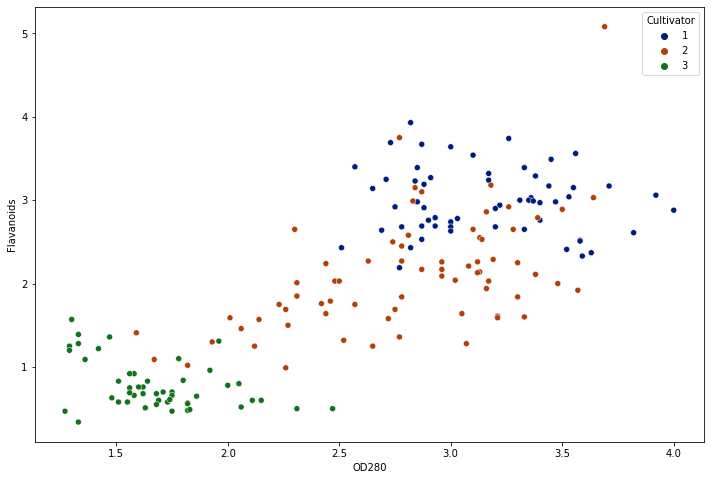

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['Flavanoids'],x=df['OD280'],hue=df['Cultivator'],palette='dark')
plt.show()

**Interpretation** the above model indicates linear model cant be  performed and even Naive Bayes (Over Lapping of Data Points appears)

In [32]:
from scipy.stats import f_oneway

g1=df[df['Cultivator']==1]
g2=df[df['Cultivator']==2]
g3=df[df['Cultivator']==3]

X=df.drop('Cultivator',axis=1)
Y=df['Cultivator']

p_val=[]
for col in X.columns:
  res=f_oneway(g1[col],g2[col],g3[col])
  p_val.append(res[1])
print(p_val)

[3.319503795619655e-36, 4.127228798041834e-14, 4.149967974793239e-06, 9.444472938826817e-14, 8.963395439251042e-06, 2.1376700154385954e-28, 3.5985858307136404e-50, 3.88804090047893e-11, 5.125358737546706e-12, 1.162008021927618e-33, 5.9176622163620664e-30, 1.393104956942896e-44, 5.783168356105498e-47]


In [37]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

# Compare it with Linear vs Non Linear model
# Linear_model=Logistic,GaussianNB
# Non_linear=RFC

### Linear Model

### for LR

In [40]:
LR=LogisticRegression()
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
print('Bias_Error',np.mean(score))
print("Variance_Error",np.std(score,ddof=1))

Bias_Error 0.9658192090395481
Variance_Error 0.05920286658639382


### GNB

In [41]:
NB=GaussianNB()
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(NB,X_std,Y,cv=kf,scoring='f1_weighted')
print('Bias_Error',np.mean(score))
print("Variance_Error",np.std(score,ddof=1))

Bias_Error 0.9490931320063195
Variance_Error 0.00031152756735189824


### Non_Linear 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    ,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df.columns

Index(['Cultivator', 'Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [51]:
X=df.drop('Cultivator',axis=1)
y=df['Cultivator']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=3)

In [62]:
#Tuninig the hyper Parameter to get Less Variance and  bias Error
RF_be=[]
RF_ve=[]
for i in range(1,100):
    RF=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=2)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    scores=cross_val_score(RF,X_std,Y,cv=kf,scoring='f1_weighted')
    RF_be.append(np.mean(1-scores))
    RF_ve.append(np.std(scores,ddof=1))
   

In [63]:
np.min(RF_be),np.argmin(RF_ve)

(0.02257448315664201, 26)

In [60]:
print('Bias_error',np.mean(scores))
print("Variance_Error",np.std(scores,ddof=1))

Bias_error 0.9774145441948994
Variance_Error 0.02607119635442501


### KNeighborsClassifier()

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)
knn_tuned=KNeighborsClassifier(n_neighbors=13,weights='uniform')
score=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)
knn_be=[]
knn_ve=[]
for i in np.arange(1,100):
  knn_bag=BaggingClassifier(base_estimator=knn_tuned,n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(knn_bag,X_std,Y,scoring='f1_weighted')
  knn_be.append(np.mean(1-scores))
  knn_ve.append(np.std(scores,ddof=1))
RF_be=[]
RF_ve=[]
for i in np.arange(1,100):
  RF=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(RF,X_std,Y,scoring='f1_weighted')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

NameError: name 'BaggingClassifier' is not defined